In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

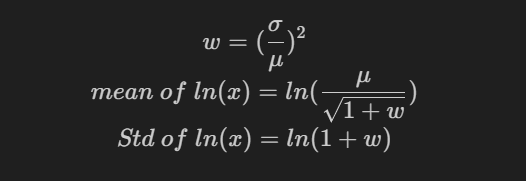

In [82]:
import numpy as np
from scipy.stats import poisson, lognorm
import pandas as pd

# Set up parameters
#ID = 11219291
lambda_val = 2  #Parameter for Poisson distribution (loss frequency)
a = 1%5  # Adjustment parameter for loss severity (can be adjusted as needed)
loss_samples = 500  # Number of loss samples to simulate

# Generate loss frequency from Poisson distribution
loss_frequency = poisson.rvs(mu=lambda_val, size=loss_samples)

# Calculate parameters for lognormal distribution (mean and std deviation)
severity_mean = 70 + a
severity_std = 20 + a
ln_severity_mean = np.log(severity_mean / np.sqrt(1 + (severity_std / severity_mean)**2))
ln_severity_std = np.sqrt(np.log(1 + (severity_std / severity_mean)**2))

# Generate loss severity from lognormal distribution
loss_severity = lognorm.rvs(s=ln_severity_std, scale=np.exp(ln_severity_mean), size=loss_samples)

# Calculate total loss as the product of loss frequency and loss severity
total_loss = loss_frequency * loss_severity

# Calculate VaR 99%
VaR_99 = np.percentile(total_loss, 99)
print(f'VaR(99%) = {VaR_99}')

# Create DataFrame to store simulation results
result = pd.DataFrame({
    'Loss Frequency': loss_frequency,
    'Loss Severity': loss_severity,
    'Total Loss': total_loss
})

# Display summary statistics of simulation results
print("\nSummary Statistics:")
print(result.describe())


VaR(99%) = 535.0546342305736

Summary Statistics:
       Loss Frequency  Loss Severity  Total Loss
count      500.000000     500.000000  500.000000
mean         1.988000      70.527021  142.021194
std          1.385531      20.763061  113.240024
min          0.000000      29.360155    0.000000
25%          1.000000      56.141357   62.941770
50%          2.000000      66.822316  119.901450
75%          3.000000      82.143932  196.519714
max          8.000000     152.970458  649.374162


In [83]:
result

,Loss Frequency,Loss Severity,Total Loss
0,1,79.383042,79.383042
1,1,61.993015,61.993015
2,1,66.092240,66.092240
3,0,66.879106,0.000000
4,1,69.213560,69.213560
...,...,...,...
495,2,106.882995,213.765990
496,5,56.790693,283.953463
497,7,69.171477,484.200341
498,2,67.953808,135.907615


c:\Users\PC\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


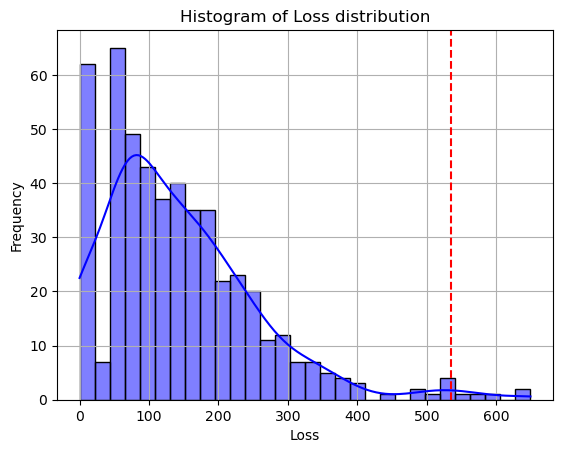

In [84]:
sns.histplot(total_loss, bins=30, kde=True, color='blue')
plt.title('Histogram of Loss distribution')
plt.xlabel('Loss')
plt.axvline(x=VaR_99, color='red', linestyle='--', label='99th Percentile')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()